## Generate datasets

In [1]:
from tools import generate_dataset
import os

In [2]:
input_dir  = '/home/gpu_user/corentin/lake-dataset/140606f/0024/'
input_testing_set  = '/home/gpu_user/corentin/lake-dataset/140606f/0024/'

output_dir  = '/home/gpu_user/corentin/training_set/'
testing_set_path = '/home/gpu_user/corentin/testing_set/'

In [ ]:
generate_dataset(input_dir, output_dir, n_images=500)

In [4]:
generate_dataset(input_testing_set,testing_set_path, n_images=100)

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((680, 1016), 40) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((680, 1016), -40) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


executing command
/home/gpu_user/corentin/flownet2/build/tools/convert_imageset_and_flow.bin /home/gpu_user/corentin/testing_set/list.txt /home/gpu_user/corentin/testing_set/data_lmdb 0 lmdb


AttributeError: 'str' object has no attribute 'stdout'

## Train

In [3]:
from train import train

In [5]:
caffe_root = "/home/gpu_user/corentin/flownet2/"
output_folder = caffe_root + "models/FlowNet2-s/train-all-layers/"
train_prototxt = output_folder + "coco-fine-tune-all-layers.prototxt"
previous_weights = caffe_root + '/models/FlowNet2-s/FlowNet2-s_weights.caffemodel'
output_weights =  output_folder + "coco-weights-full-train.caffemodel"

In [ ]:
_, loss, test_loss = train(train_prototxt, previous_weights, output_weights, 
                           iterations=50000, disp_interval=40,
                          log_file=output_folder + "train-logs")

Loading net and solver
Starting training
  0) solver: loss=7960.64, test_loss=3817.91
 20) solver: loss=7155.00, test_loss=4021.73
 40) solver: loss=10087.19, test_loss=3716.48
 60) solver: loss=14965.20, test_loss=4064.60
 80) solver: loss=7145.16, test_loss=3361.92
100) solver: loss=9603.60, test_loss=3656.45
120) solver: loss=7670.17, test_loss=3507.54
140) solver: loss=12222.70, test_loss=3701.60
160) solver: loss=7669.62, test_loss=3498.22
180) solver: loss=7830.34, test_loss=3508.40
200) solver: loss=5173.99, test_loss=3612.87
220) solver: loss=8566.10, test_loss=3596.62
240) solver: loss=11616.38, test_loss=3698.42
260) solver: loss=6350.47, test_loss=3588.70
280) solver: loss=7582.28, test_loss=3422.66
300) solver: loss=8341.45, test_loss=3563.87
320) solver: loss=7363.63, test_loss=3252.87
340) solver: loss=8827.77, test_loss=3514.69
360) solver: loss=7972.03, test_loss=3422.66
380) solver: loss=6687.48, test_loss=3310.44
400) solver: loss=8337.11, test_loss=3484.27
420) solve

In [1]:
from tools import test_model_on_image_pair
from run_model import run_model

deploy_model = "/home/gpu_user/corentin/flownet2/models/FlowNet2-s/FlowNet2-s_deploy.prototxt.template"
img0 = "/home/gpu_user/corentin/testing_set/0995-1.ppm"
img1 = "/home/gpu_user/corentin/testing_set/0995-2.ppm"
real_flow = "/home/gpu_user/corentin/testing_set/0995.flo"
weights = "/home/gpu_user/corentin/flownet2/models/FlowNet2-s/train-all-layers/coco-weights-full-train.caffemodel"
original_weights = "/home/gpu_user/corentin/flownet2/models/FlowNet2-s/FlowNet2-s_weights.caffemodel"
output_prefix = "/home/gpu_user/corentin/cdancette-flownet-tools/experiments/experiment1/test_img/743"

In [25]:
output_1_flow = test_model_on_image_pair(deploy_model, weights, img0, img1, output_prefix)

starting run_model
coucou
Network forward pass using /home/gpu_user/corentin/flownet2/models/FlowNet2-s/train-all-layers/coco-weights-full-train.caffemodel.
Succeeded.
Reading 680 x 1016 flow file in .flo format
    h, w = flow.shape[:2]
(680, 1016, 2)
(680, 1016, 3)
pre remap
(680, 1016)
(680, 1016)
(680, 1016, 3)
remap done
max flow: 62.2703
flow range:
u = 35.506 .. 45.266
v = -45.639 .. -31.143


In [11]:
from lib.flowlib import show_flow, read_flow
%matplotlib inline

# Test on translated image

### Real flow

Reading 680 x 1016 flow file in .flo format
max flow: 56.5685
flow range:
u = 40.000 .. 40.000
v = -40.000 .. -40.000


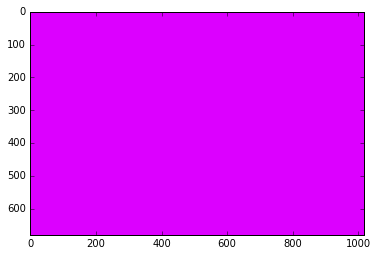

In [27]:
show_flow(real_flow)

### Experiment 1 flow

Reading 680 x 1016 flow file in .flo format
max flow: 62.2703
flow range:
u = 35.506 .. 45.266
v = -45.639 .. -31.143


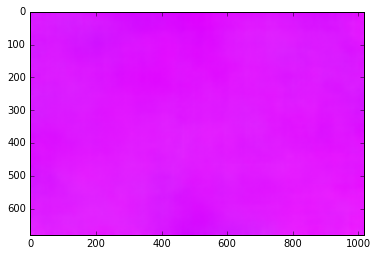

In [28]:
show_flow(output_1_flow)

### Experiment 0 flow

In [29]:
output_0_flow = test_model_on_image_pair(deploy_model, original_weights, img0, img1, output_prefix + '-exp0')

starting run_model
coucou
Network forward pass using /home/gpu_user/corentin/flownet2/models/FlowNet2-s/FlowNet2-s_weights.caffemodel.
Succeeded.
Reading 680 x 1016 flow file in .flo format
    h, w = flow.shape[:2]
(680, 1016, 2)
(680, 1016, 3)
pre remap
(680, 1016)
(680, 1016)
(680, 1016, 3)
remap done
max flow: 66.1894
flow range:
u = 32.097 .. 49.986
v = -48.853 .. -28.790


Reading 680 x 1016 flow file in .flo format
max flow: 66.1894
flow range:
u = 32.097 .. 49.986
v = -48.853 .. -28.790


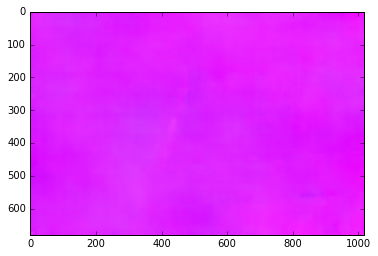

In [30]:
show_flow(output_0_flow)

In [31]:
from tools import calculate_loss

In [32]:
print(calculate_loss(read_flow(real_flow), read_flow(output_1_flow)))
print(calculate_loss(read_flow(real_flow), read_flow(output_0_flow)))

Reading 680 x 1016 flow file in .flo format
Reading 680 x 1016 flow file in .flo format
1720.36510995
Reading 680 x 1016 flow file in .flo format
Reading 680 x 1016 flow file in .flo format
2670.6413948


The finetuned model is better than the original one on this image.

#  Test on real image

In [12]:
from tools import test_model_on_image_pair
from lib.flowlib import show_flow
%matplotlib inline
deploy_model = "/home/gpu_user/corentin/flownet2/models/FlowNet2-s/FlowNet2-s_deploy.prototxt.template"
img0 = "/home/gpu_user/corentin/lake-dataset/140606f/0027/0870.jpg"
img1 = "/home/gpu_user/corentin/lake-dataset/140606f/0027/0871.jpg"
weights = "/home/gpu_user/corentin/flownet2/models/FlowNet2-s/train-all-layers/coco-weights-full-train.caffemodel"
original_weights = "/home/gpu_user/corentin/flownet2/models/FlowNet2-s/FlowNet2-s_weights.caffemodel"
output_prefix = "/home/gpu_user/corentin/cdancette-flownet-tools/experiments/experiment1/test_real_image/870-871"

In [13]:
output_1_flow = test_model_on_image_pair(deploy_model, weights, img0, img1, output_prefix)

starting run_model
(704, 480)
Network forward pass using /home/gpu_user/corentin/flownet2/models/FlowNet2-s/train-all-layers/coco-weights-full-train.caffemodel.
Succeeded.
max flow: 19.5567
flow range:
u = -19.527 .. 13.273
v = -7.839 .. 5.074


In [14]:
output_0_flow = test_model_on_image_pair(deploy_model, original_weights, img0, img1, output_prefix + 'out0')

starting run_model
(704, 480)
Network forward pass using /home/gpu_user/corentin/flownet2/models/FlowNet2-s/FlowNet2-s_weights.caffemodel.
Succeeded.
max flow: 5.2424
flow range:
u = -3.070 .. 5.238
v = -2.451 .. 2.697


max flow: 19.5567
flow range:
u = -19.527 .. 13.273
v = -7.839 .. 5.074


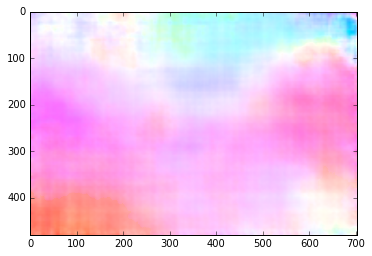

In [15]:
show_flow(output_1_flow)

max flow: 5.2424
flow range:
u = -3.070 .. 5.238
v = -2.451 .. 2.697


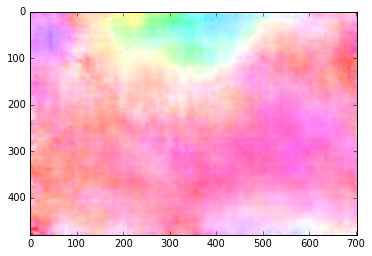

In [16]:
show_flow(output_0_flow)

In [ ]:

test_prototxt = "/home/gpu_user/corentin/cdancette-flownet-tools/models/FlowNet2-s-warp-flow-loss/train.prototxt"
run_model_lmdb(test_prototxt, weights, '/home/gpu_user/corentin/cdancette-flownet-tools/experiments/experiment1/test_lmdb', 
               blobs=['flow_loss2', 'flow_loss3', 'flow_loss4', 'flow_loss5', 'flow_loss6',
                     'warp_loss2', 'warp_loss3', 'warp_loss4', 'warp_loss5', 'warp_loss6'], save_input=False)

In [ ]:
%run run_model.py
weights = "/home/gpu_user/corentin/flownet2/models/FlowNet2-s/train-all-layers/coco-weights-full-train.caffemodel"

deploy_prototxt = "/home/gpu_user/corentin/cdancette-flownet-tools/models/Flownet2-s-warploss/deploy.prototxt"
listfile = "/home/gpu_user/corentin/testing_set/list.txt"
run_model_multiples(deploy_prototxt, weights, listfile, '/home/gpu_user/corentin/cdancette-flownet-tools/experiments/experiment1/test_lmdb',
                   ['warp_loss2', 'warp_loss3', 'warp_loss4', 'warp_loss5', 'warp_loss6'])

('processing', 0)
